<a href="https://colab.research.google.com/github/KarenCruz2511/EDP/blob/main/Ejercicio(a).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Ecuacion de Dirichlet 
La solución de la ecuación de Laplace:
$$\frac{∂^2u}{∂x^2}+\frac{∂^2u}{∂y^2}=0,~~~~~0 < x < 1,~~~~~0 < y < 1$$
sujeta a las condiciones de frontera:
$$u(0, y) = u(1, y) = 0;~u(x, 0) = 100;~u(x, 1) = 200$$
Esta dada en términos de la serie de Fourier por la expresión:
$$u(x,y) = \sum_{n=1}^{∞} \sin(n\pi x) \left( \frac{200(1+(-1)^{n+1})}{n\pi}(\cosh(n\pi y))+ \frac{400(1+(-1)^{n+1})}{n\pi \sinh(n\pi)} (\sinh(n\pi y))(\sin(n \pi x))\right)$$
Este problema modela la transferencia de calor en una barra ideal delgada, con  k=1 .


In [27]:
from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D
from math import *
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.style as style

Para empezar, graficamos la condición inicial $u(x,0)=100$

In [28]:
def funcion(x):
  if (x>0 and x<1):
    return 100

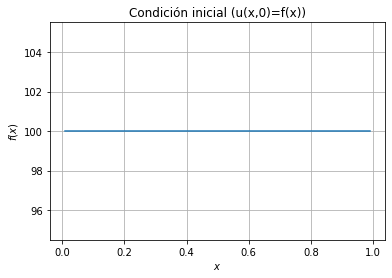

In [29]:
x = []
y = []
for k in range(101):
  x.append(0.01*k)
  y.append(funcion(0.01*k))
plt.plot(x,y,label='$u(x,0)=100$')
plt.xlabel('$x$'); plt.ylabel('$f(x)$'); 
plt.title("Condición inicial (u(x,0)=f(x))")
plt.grid()
plt.show()

Usamos una serie de Fourier para aproximar la condición inicial $u(x,0)=f(x)=100$.

In [30]:
def serie(x,N): # N es el número de armónicos
    fn = 0
    for n in range(1,N+1):
        fn += (((-1)**n-1)/n)*sin(n*pi*x)
    return (-200/pi)*fn

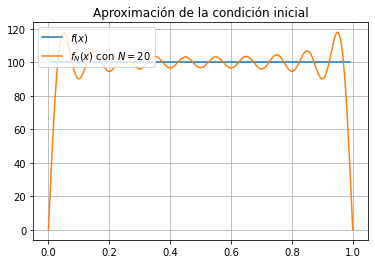

In [31]:
x1=[]
y1=[]
for i in range(1001):
  x1.append(0.001*i)
  y1.append(serie(0.001*i,20))
plt.plot(x,y,label='$f(x)$')
plt.plot(x1,y1,label='$f_N(x)$ con $N=20$')
plt.title("Aproximación de la condición inicial")
plt.legend(loc='upper left')
plt.grid()
plt.show()

Podemos visualizar la aproximación para diferentes cantidades de armónicos.

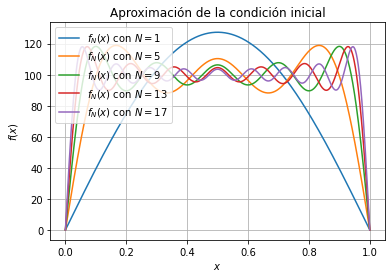

In [32]:
def F(lista,N):
  l=[]
  for t in range(len(lista)):
    l.append(serie(lista[t],N))
  return l
for i in range(1,20,4):
    plt.plot(x1,F(x1,i),label='$f_N(x)$ con $N=%d$' %i)
plt.xlabel('$x$'); plt.ylabel('$f(x)$'); 
plt.title("Aproximación de la condición inicial")
plt.legend(loc='upper left')
plt.grid()
plt.show()

Ahora, agregamos la parte temporal para visualizar la solución completa. Primero, para el momento inicial, $t=0$.

In [33]:
def u(x,y):
  fn = 0
  for n in range(1,81):
    fn += (-(200/pi)*( ((-1)**n-1)/n )*cosh(n*pi*y) + (200/pi)*( ((-1)**n-1)/n )*cosh(n*pi)*(sinh(n*pi*y)/sinh(n*pi)) + (-400*((-1)**n-1)/(pi*n))*(sinh(n*pi*y)/sinh(n*pi)) )*sin(n*pi*x)
  return fn
y2=[]
for n2 in range(len(x1)):
  y2.append(u(x1[n2],0))

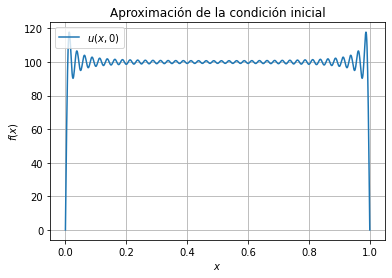

In [34]:
plt.plot(x1,y2,label='$u(x,0)$')
plt.xlabel('$x$'); plt.ylabel('$f(x)$'); 
plt.title("Aproximación de la condición inicial")
plt.grid()
plt.legend(loc='upper left')
plt.show()

Luego, para diferentes tiempos, lo cual nos permite ver cómo la solución evoluciona cuando $t \to \infty$.

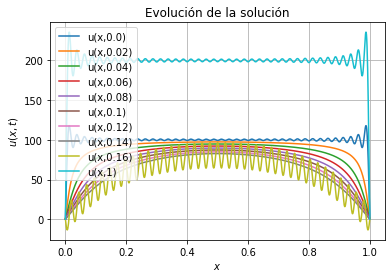

In [35]:
def u_n(lista,t):
  l=[]
  for n in range(len(lista)):
    l.append(u(lista[n],t))
  return l
for t2 in range(0,18,2):
  v=round(0.01*t2,2)
  plt.plot(x1,u_n(x1,0.01*t2), label='u(x,%r)'%v)
plt.plot(x1,u_n(x1,1), label='u(x,1)')
plt.xlabel('$x$'); plt.ylabel('$u(x,t)$'); 
plt.title("Evolución de la solución")
plt.grid()
plt.legend(loc='upper left')
plt.show()

Y podemos ver esto en una gráfica en 3D.

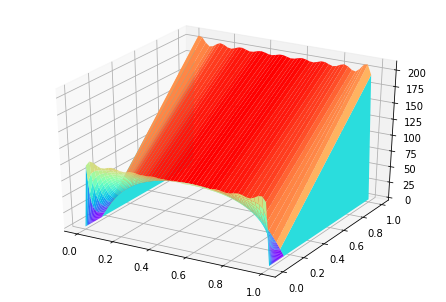

In [40]:
X=np.linspace(0,1)
v_y = []
for j in range(15):
    v_y.append(0.01*j)
v_y.append(1)
Y=np.array(v_y)
X,Y=np.meshgrid(X,Y)
def Z(x,t):
  s = np.zeros(np.shape(x))
  for i in range(np.shape(x)[0]):
    for j in range(np.shape(x)[1]):
      s[i][j]=u(x[i][j],t[i][j])
  return s
fig = plt.figure()
ax = Axes3D(fig)
ax.plot_surface(X,Y,Z(X,Y), rstride=1, cstride=1, cmap=cm.rainbow)
plt.show()